# Cálculo del Jacobiano del vector de flujos
Brayan Santiago Amorocho Lizcano


In [1]:
#Importamos bibliotecas importantes
import sympy as sp
import numpy as np 
import matplotlib.pyplot as plt

In [3]:

def calcular_jacobiano(F, Q):
    """
    Calcula el Jacobiano de una función vectorial F respecto a un vector Q.
    
    Parámetros:
        F (list): Lista de expresiones simbólicas que representan la función vectorial F.
        Q (list): Lista de variables simbólicas que representan el vector Q.
    
    Retorna:
        sp.Matrix: Matriz que representa el Jacobiano de F respecto a Q.
    """
    # Asegurarnos de que F y Q son vectores en forma de matriz columna
    F = sp.Matrix(F)
    Q = sp.Matrix(Q)
    
    # Calcular el Jacobiano
    jacobiano = F.jacobian(Q)
    
    return jacobiano

# Definimos las variables simbólicas
Bx, By, Bz = sp.symbols('Bx By Bz')
Mx, My, Mz = sp.symbols('Mx My Mz')
p_m = sp.symbols('p_m')
E = sp.symbols('E')

#Constantes
mu = sp.symbols('mu')
gamma = sp.symbols('gamma')

#Definimos la magnitud al cuadrado de los vectores M y B
M2 = Mx**2 + My**2 + Mz**2
B2 = Bx**2 + By**2 + Bz**2

#Definimos el producto punto de los vectores M y B
M_dot_B = Mx*Bx + My*By + Mz*Bz

#Definimos el vector Q como el vector de variables conservativas
Q = [p_m, Mx, My, Mz, E, Bx, By, Bz]

#Definimos el vector F como el vector de flujo, pero lo armaremos por componentes 
f1 = Mx
f2 = Mx**2/p_m - Bx**2/mu + (gamma -1)*E - (gamma - 1)*M2/(2*p_m) - (gamma - 2) * B2/(2*mu)
f3 = Mx*My/p_m - Bx*By/mu
f4 = Mx*Mz/p_m - Bx*Bz/mu
f5 = Mx/p_m * (gamma * E - (gamma - 1) * M2/(2*p_m) - (gamma - 2) * B2/(2*mu)) - Bx/mu / p_m * M_dot_B
f6 = 0
f7 = (Mx*By - My*Bx) / p_m
f8 = (Mx*Bz - Mz*Bx) / p_m

F = [f1, f2, f3, f4, f5, f6, f7, f8]

#Calculamos el Jacobiano
A = calcular_jacobiano(F, Q)

#Imprimimos el Jacobiano
print('Jacobiano:')
A




Jacobiano:


Matrix([
[                                                                                                                                                                                                          0,                                                                                                                                                     1,                                          0,                                          0,            0,                                                                               0,                                            0,                                            0],
[                                                                                                                                             -Mx**2/p_m**2 + (gamma - 1)*(Mx**2 + My**2 + Mz**2)/(2*p_m**2),                                                                                                                        -Mx*(gamma - 1)/p_m + 2*Mx/p_m,  

In [16]:
# Calculamos los valores propios de la matriz A
valores_propios = A.eigenvals()
# Representando los valores propios en sympy
valores_propios_simp = sp.simplify(valores_propios)
#Impresión de los valores propios sin su multiplicidad
valores_propios_simp.keys()


dict_keys([0, Mx/p_m, (Bx*sqrt(mu*p_m**3) + Mx*mu*p_m)/(mu*p_m**2), (-Bx*sqrt(mu*p_m**3) + Mx*mu*p_m)/(mu*p_m**2), Mx/p_m + sqrt(-(Bx**2*gamma**2*p_m - Bx**2*gamma*p_m - 2*Bx**2*p_m + By**2*gamma**2*p_m - By**2*gamma*p_m - 2*By**2*p_m + Bz**2*gamma**2*p_m - Bz**2*gamma*p_m - 2*Bz**2*p_m - 2*E*gamma**2*mu*p_m + 2*E*gamma*mu*p_m + Mx**2*gamma**2*mu - Mx**2*gamma*mu + My**2*gamma**2*mu - My**2*gamma*mu + Mz**2*gamma**2*mu - Mz**2*gamma*mu)/(4*mu*p_m**2) - sqrt(Bx**4*gamma**4*p_m**2 - 2*Bx**4*gamma**3*p_m**2 + 5*Bx**4*gamma**2*p_m**2 - 4*Bx**4*gamma*p_m**2 + 4*Bx**4*p_m**2 + 2*Bx**2*By**2*gamma**4*p_m**2 - 4*Bx**2*By**2*gamma**3*p_m**2 + 2*Bx**2*By**2*gamma**2*p_m**2 + 8*Bx**2*By**2*p_m**2 + 2*Bx**2*Bz**2*gamma**4*p_m**2 - 4*Bx**2*Bz**2*gamma**3*p_m**2 + 2*Bx**2*Bz**2*gamma**2*p_m**2 + 8*Bx**2*Bz**2*p_m**2 - 4*Bx**2*E*gamma**4*mu*p_m**2 + 8*Bx**2*E*gamma**3*mu*p_m**2 - 12*Bx**2*E*gamma**2*mu*p_m**2 + 8*Bx**2*E*gamma*mu*p_m**2 + 2*Bx**2*Mx**2*gamma**4*mu*p_m - 4*Bx**2*Mx**2*gamma**3*mu*p_m 

In [15]:
#Definamos nuevas variables simbólicas
ux = Mx/p_m
ca = Bx / sp.sqrt(mu * p_m)
p = sp.symbols('p')
E = 1/2 * p_m * ux**2 + p/(gamma - 1) + 1/2 * B2/mu
a = sp.sqrt(gamma * p / p_m)
#Simplificamos los valores propios reemplazando las variables
valores_propios_simp = valores_propios_simp.subs({Mx: p_m * ux, Bx: ca * sp.sqrt(mu * p_m), E: E, p: p, gamma: gamma})
#Imprimimos los valores propios sin su multiplicidad
valores_propios_simp.keys()

dict_keys([0, Mx/p_m, (Bx*sqrt(mu*p_m**3) + Mx*mu*p_m)/(mu*p_m**2), (-Bx*sqrt(mu*p_m**3) + Mx*mu*p_m)/(mu*p_m**2), Mx/p_m + sqrt(-(Bx**2*gamma**2*p_m - Bx**2*gamma*p_m - 2*Bx**2*p_m - 2*E*gamma**2*mu*p_m + 2*E*gamma*mu*p_m + Mx**2*gamma**2*mu - Mx**2*gamma*mu)/(4*mu*p_m**2) - sqrt(Bx**4*gamma**4*p_m**2 - 2*Bx**4*gamma**3*p_m**2 + 5*Bx**4*gamma**2*p_m**2 - 4*Bx**4*gamma*p_m**2 + 4*Bx**4*p_m**2 - 4*Bx**2*E*gamma**4*mu*p_m**2 + 8*Bx**2*E*gamma**3*mu*p_m**2 - 12*Bx**2*E*gamma**2*mu*p_m**2 + 8*Bx**2*E*gamma*mu*p_m**2 + 2*Bx**2*Mx**2*gamma**4*mu*p_m - 4*Bx**2*Mx**2*gamma**3*mu*p_m + 6*Bx**2*Mx**2*gamma**2*mu*p_m - 4*Bx**2*Mx**2*gamma*mu*p_m + 4*E**2*gamma**4*mu**2*p_m**2 - 8*E**2*gamma**3*mu**2*p_m**2 + 4*E**2*gamma**2*mu**2*p_m**2 - 4*E*Mx**2*gamma**4*mu**2*p_m + 8*E*Mx**2*gamma**3*mu**2*p_m - 4*E*Mx**2*gamma**2*mu**2*p_m + Mx**4*gamma**4*mu**2 - 2*Mx**4*gamma**3*mu**2 + Mx**4*gamma**2*mu**2)/(4*mu*p_m**2)), Mx/p_m + sqrt(-(Bx**2*gamma**2*p_m - Bx**2*gamma*p_m - 2*Bx**2*p_m - 2*E*gamma**2*m

In [17]:
#Encontramos los vectores propios
vectores_propios = A.eigenvects()
#Imprimimos los vectores propios
vectores_propios

KeyboardInterrupt: 

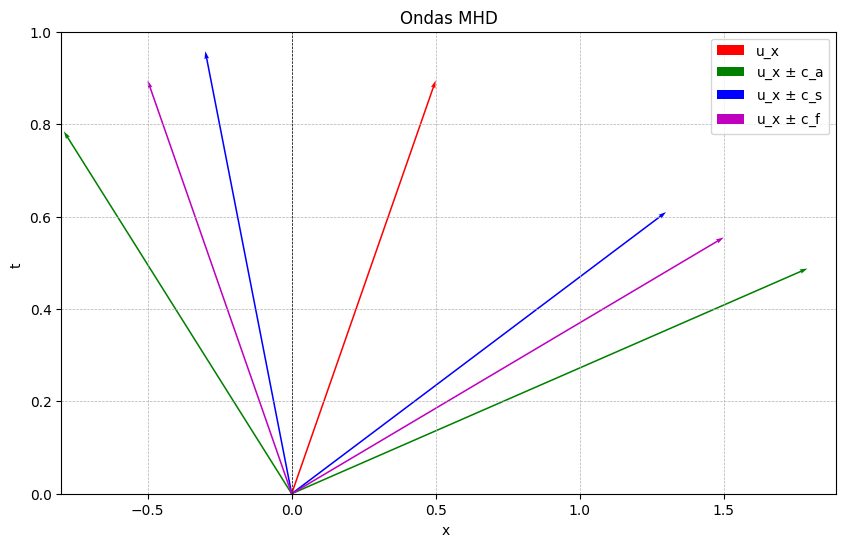

In [62]:
#Graficamos los valores propios para valores unitarios

# Definimos parámetros y constantes
B, mu, p_m, p = 1, 1, 1, 1
gamma = 5 / 3
ux = 0.5  # Velocidad en x

# Calculamos los valores auxiliares
ca = B / np.sqrt(mu * p_m)  # Velocidad de Alfvén
a = np.sqrt(gamma * p_m / p)  # Velocidad del sonido
cf = np.sqrt(0.5 * (a**2 + B**2 / (mu * p_m) + np.sqrt((a**2 + B**2 / (mu * p_m))**2 - 4 * a**2 * ca**2)))
cs = np.sqrt(0.5 * (a**2 + B**2 / (mu * p_m) - np.sqrt((a**2 + B**2 / (mu * p_m))**2 - 4 * a**2 * ca**2))) -0.2

# Valores propios
l1 = ux
l2 = ux + cf
l3 = ux - cf
l4 = ux + cs
l5 = ux - cs
l6 = ux + ca
l7 = ux - ca

# Coordenadas para graficar
vl1 = np.array([l1, 1])
vl2 = np.array([l2, 1])
vl3 = np.array([l3, 1])
vl4 = np.array([l4, 1])
vl5 = np.array([l5, 1])
vl6 = np.array([l6, 1])
vl7 = np.array([l7, 1])

# Normalizamos los vectores
norm_vl1 = np.linalg.norm(vl1)
norm_vl2 = np.linalg.norm(vl2)
norm_vl3 = np.linalg.norm(vl3)
norm_vl4 = np.linalg.norm(vl4)
norm_vl5 = np.linalg.norm(vl5)
norm_vl6 = np.linalg.norm(vl6)
norm_vl7 = np.linalg.norm(vl7)

# Creamos la figura
plt.figure(figsize=(10, 6))

# Graficamos los vectores con menor grosor y solo valores positivos con norma 
plt.quiver(0, 0, vl1[0], vl1[1]/norm_vl1, angles='xy', scale_units='xy', scale=1, width=0.002, color='r', label='u_x')
plt.quiver(0, 0, vl2[0], vl2[1]/norm_vl2, angles='xy', scale_units='xy', scale=1, width=0.002, color='g', label=r'u_x $\pm$ c_a')
plt.quiver(0, 0, vl3[0], vl3[1]/norm_vl3, angles='xy', scale_units='xy', scale=1, width=0.002, color='g')
plt.quiver(0, 0, vl4[0], vl4[1]/norm_vl4, angles='xy', scale_units='xy', scale=1, width=0.002, color='b', label=r'u_x $\pm$ c_s')
plt.quiver(0, 0, vl5[0], vl5[1]/norm_vl5, angles='xy', scale_units='xy', scale=1, width=0.002, color='b')
plt.quiver(0, 0, vl6[0], vl6[1]/norm_vl6, angles='xy', scale_units='xy', scale=1, width=0.002, color='m', label=r'u_x $\pm$ c_f')
plt.quiver(0, 0, vl7[0], vl7[1]/norm_vl7, angles='xy', scale_units='xy', scale=1, width=0.002, color='m')

# Configuramos el gráfico
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Línea de referencia horizontal
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Línea de referencia vertical
plt.xlim(-(0.8), max(l1, l2, l3, l4, l5, l6, l7) + 0.1)
plt.ylim(0, 1)  # Solo valores positivos
plt.xlabel('x ')
plt.ylabel('t ')
plt.title('Ondas MHD')
plt.legend()
plt.grid(linestyle='--', linewidth=0.5)
#plt.axis('equal')

# Mostramos el gráfico
plt.savefig("valores_propios.png", dpi=300)  # Opcional: guarda la figura
plt.show()


1.0